In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
data = pd.read_csv("customer_churn_dataset-testing-master[1].csv")

# Display first few rows
print("First 5 rows of dataset:")
print(data.head())

# Check for missing values and data types
print("\nDataset Info:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


First 5 rows of dataset:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4     

In [ ]:
X = data[['Tenure']]   # independent variable
y = data['Total Spend']   # dependent variable

In [ ]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])


Intercept (b0): 534.883464580102
Slope (b1): 0.175090532919694


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


       Actual   Predicted
15476     635  538.385275
34666     631  539.610909
50474     314  545.388897
7984      527  543.112720
20227     236  544.688534


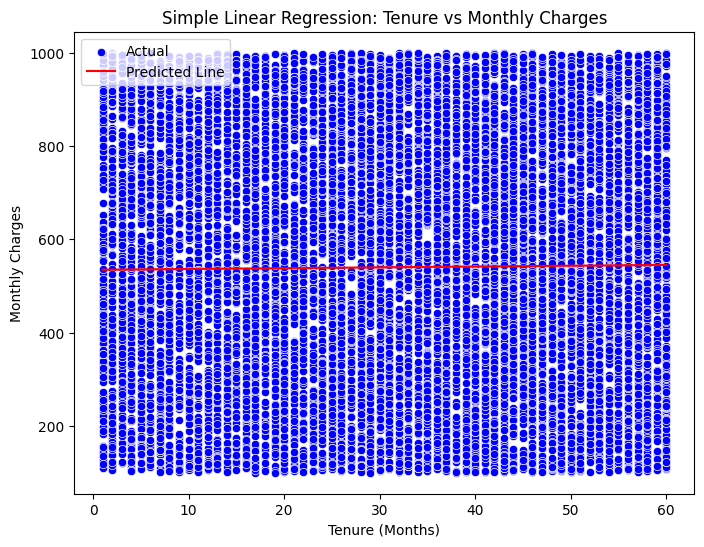

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Predicted Line')
plt.title("Simple Linear Regression: Tenure vs Monthly Charges")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.legend()
plt.show()


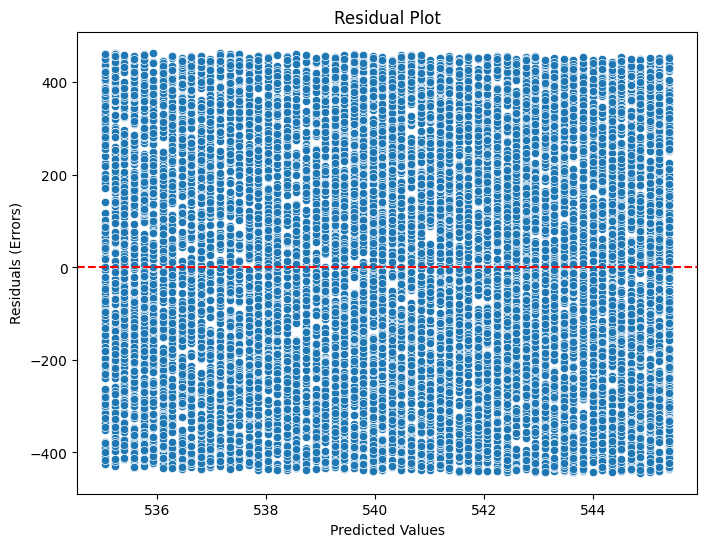

In [ ]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.show()


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 68233.63038286162
R-squared Score: -0.00020630155329692812
